In [25]:
# matplotlib rebuild
import matplotlib as mpl
import FinanceDataReader as fdr

# mpl.font_manager._rebuild()

# matplotlib 환경 설정
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'Malgun Gothic' # window
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000


- USD/KRW 달러당 원화 환율
- USD/EUR 달러당 유로화 환율
- USD/JPY 달러당 엔화 환율
- CNY/KRW 위엔화 원화 환율
- EUR/USD 유로화 달러 환율
- USD/JPY 달러 엔화 환율
- JPY/KRW 엔화 원화 환율
- AUD/USD 오스트레일리아 달러 환율
- EUR/JPY 유로화 엔화 환율
- USD/RUB 달러 루블화

## 데이터 가져오기

In [26]:
etf_list = [
  ['SOXX','SOXX'],
  ['QQQ','QQQ'],
  ['TQQQ','TQQQ'],
  ['SPY','SPY'],
  ['TLT','TLT'],
  ['SOXL','SOXL']
] 

In [27]:
# soxx = fdr.DataReader('SOXL', '2020')
# soxx['Close'].tail()

In [28]:
# etf_list

usdkrw = fdr.DataReader('USD/KRW', '2020')
usdkrw['Close'].tail()

usdeur = fdr.DataReader('USD/EUR', '2020')
usdeur['Close'].tail()

usdjpy = fdr.DataReader('USD/JPY', '2020')
usdjpy['Close'].tail()

eurjpy = fdr.DataReader('EUR/JPY', '2020')
eurjpy['Close'].tail()

usdgbp = fdr.DataReader('USD/GBP', '2020')
usdgbp['Close'].tail()

In [29]:
import pandas as pd

df_etf = [fdr.DataReader(code, '2020-01-01')['Close']for name, code in etf_list]
len(etf_list)

6

In [30]:
# df_etf

In [31]:
# pd.concat()로 합치기

df = pd.concat(df_etf, axis=1)
df.columns = [name for name, code in etf_list] 
df.tail(20)

,SOXX,QQQ,TQQQ,SPY,TLT,SOXL
Date,,,,,,
2023-05-30,489.260010,349.980011,35.470001,420.179993,102.099998,22.870001
2023-05-31,476.700012,347.989990,34.750000,417.850006,102.989998,21.150000
2023-06-01,484.899994,352.010010,36.009998,421.820007,103.120003,22.160000
2023-06-02,483.760010,354.649994,36.820000,427.920013,101.989998,22.020000
2023-06-05,476.269989,354.899994,36.900002,427.100006,101.800003,20.969999
2023-06-06,482.019989,354.839996,36.860001,428.029999,102.400002,21.730000
2023-06-07,480.660004,348.820007,34.980000,426.549988,100.879997,21.639999
2023-06-08,485.579987,353.149994,36.180000,429.130005,102.059998,22.280001
2023-06-09,486.859985,354.500000,36.619999,429.899994,101.919998,22.400000


## 데이터 시각화

In [32]:
# df.plot()

## y 보조축 만들기

In [33]:
# df[['LG화학', '삼성전자']].plot(secondary_y=['LG화학'])

## 비교를 위해 데이터 정규화
- 전체 데이터를 첫번째 row로 나누고 -1.0

In [34]:
# df2 = df[['LG화학', '삼성전자']]

# df_plot = df2 / df2.iloc[0] - 1.0
# df_plot.plot()

## 여러 종목 정규화 및 비교 차트

<Axes: xlabel='Date'>

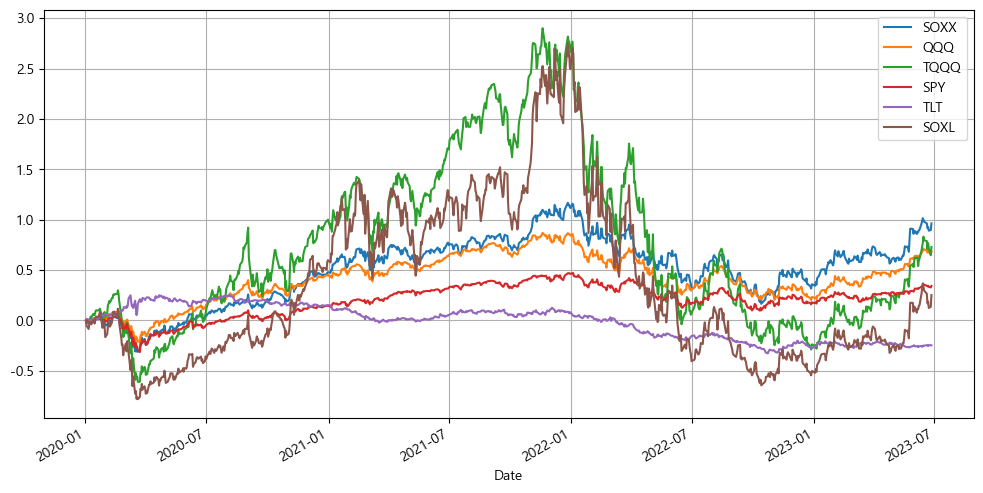

In [35]:
df_norm = df / df.iloc[0] - 1
df_norm.plot()

In [36]:
df_norm.iloc[-1].sort_values(ascending=False)

SOXX    0.963713
TQQQ    0.728754
QQQ     0.683151
SPY     0.342599
SOXL    0.252055
TLT    -0.246989
Name: 2023-06-27 00:00:00, dtype: float64

## 회귀분석 하기
### TLT / SOXL
- 상관관계를 분석해서 업종 지수에 대한 비교 및 특정 종목이 따라가지 못 하는 경우 내.외부 요인 판단 가능

In [ ]:
from sklearn.linear_model import LinearRegression #sklearn 싸이킷런에서 회귀모델을 가져오겠다.
import numpy as np

In [ ]:
X = df.iloc[:,np.ravel(1)].values # soxx
y = df.iloc[:,-1].values # tlt
X,y
# len(X), len(y)

In [ ]:
reg = LinearRegression() # 객체 생성
reg.fit(X,y) # fit이 학습모델 -> 학습하면서 모델생성

In [ ]:
y.shape,X.shape

In [ ]:
y_pred = reg.predict(X) # X에 대한 예측 값
y_pred

In [ ]:
X.shape, y.shape

In [ ]:
plt.scatter(X,y, color='blue') # 산점도 그래프 (실제 값 그래프)
plt.plot(X, y_pred, color='green')  # 선 그래프 (싸이킷런에서 회귀모델로 학습한 훟 예측한 그래프)
plt.title('tlt BY soxx')
plt.xlabel('soxx')
plt.ylabel('tlt')
plt.show()

In [ ]:
print('soxx에 따른 tlt 예측 값 :', reg.predict([[530]]))
# print('9,8,10시간 공부했을 때 예상 점수 :', reg.predict([[9],[8],[10]]))

In [ ]:
reg.coef_, reg.intercept_

## 데이터 세트 분리

In [ ]:
from sklearn.model_selection import train_test_split  # 데이터 분리는 sklearn.moder_selection 이고 리니어는 sklearn.linear_modeol import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)  # 테스트 사이즈를 8:2로 하겠다 test_size = 0.2 random_state = 0 은 그냥 확인용

In [ ]:
len(X_train), len(X_test)

In [ ]:
len(y_train), len(y_test)

### 분리된 데이터를 통해 모델링

In [ ]:
reg = LinearRegression()
reg.fit(X_train, y_train) # 훈련세트로 학습

In [ ]:
plt.scatter(X_train,y_train, color='blue') # 산점도 그래프 -> 실제 값?
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프  -> 예측 값?
plt.title('tlt BY soxx(train data)')
plt.xlabel('soxx')
plt.ylabel('tlt')
plt.show()

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 
plt.title('tlt BY soxx(train data)')
plt.xlabel('soxx')
plt.ylabel('tlt')
plt.show()

In [ ]:
reg.coef_, reg.intercept_

### 모델평가

In [ ]:
reg.score(X_train, y_train)

In [ ]:
reg.score(X_test, y_test)

### 경사하강법

In [ ]:
from sklearn.linear_model import SGDRegressor # SGF 확률적 경사하강법 
#지수 표기법
#1e-3 = 0.001 10^-3
#1e-4 = 0.0001 10^-4
#1e+3 = 1000 10^3
#1e+4 = 10000 10^4


# sr = SGDRegressor()
sr = SGDRegressor(max_iter=1000, eta0=1e-4, random_state=0, verbose=1)  #에포크 방식
sr.fit(X_train, y_train)

In [ ]:
plt.scatter(X_test,y_test, color='blue') # 산점도 그래프
plt.plot(X_train, sr.predict(X_train), color='green')  # 선 그래프 
plt.title('하이닉스 BY 삼성전자(train data)')
plt.xlabel('삼성전자')
plt.ylabel('하이닉스')
plt.show()

In [ ]:
sr.coef_, sr.intercept_

In [ ]:
sr.score(X_test, y_test) # 테스트 세트를 통한 모델평가

In [ ]:
sr.score(X_train, y_train) # 룬련 세트를 통한 모델평가

In [ ]:
pip install pandas-datareader

In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import yfinance as yf
import datetime

commodity_symbol = "GC=F"  # Gold symbol
start_date = "2023-01-01"
end_date = "2023-06-27"

data = yf.download(commodity_symbol, start=start_date, end=end_date)
print(data.tail(10))